In [ ]:
import nltk
import numpy as np
import pandas as pd

import string
import re
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/INFOSYS365/Data/ufo_sighting_data1.csv')
print(dataset.shape)
dataset.head()

<ipython-input-3-d33ffd505931>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/INFOSYS365/Data/ufo_sighting_data1.csv')


(80329, 11)


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
wn = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    tokens = text.split()

    # Remove stopwords, lemmatize and drop words length < 2
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords and len(word) > 2]

    return text

In [ ]:
dataset['cleaned_description'] = dataset['description'].apply(lambda x: preprocess_text(str(x)))

In [ ]:
# Create a word cloud for the text column
wordcloud = WordCloud(max_words=1000,random_state=1).generate(str(dataset['cleaned_description']))

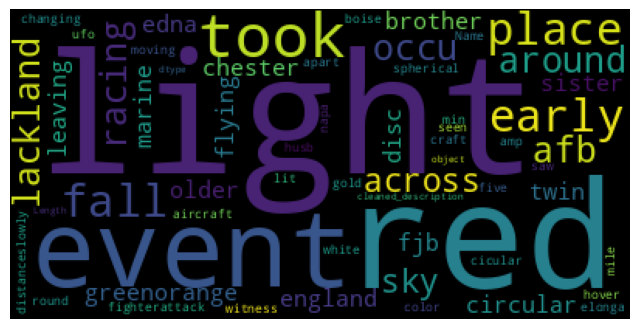

In [ ]:
# Plot the WordCloud image
plt.figure(figsize = (8, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show();

In [ ]:
dataset['description'].isnull().sum()

15

In [ ]:
dataset = dataset.dropna(subset=['description'])

In [ ]:
dataset['description'].isna().sum()

0

In [ ]:
vectorizer = TfidfVectorizer(analyzer = preprocess_text, stop_words='english')
X = vectorizer.fit_transform(dataset['description'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


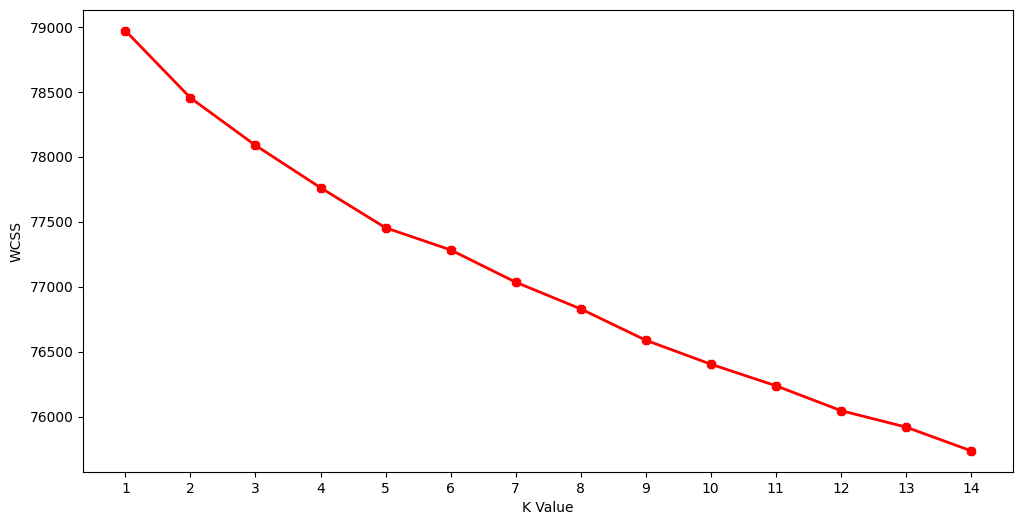

In [ ]:
import matplotlib.pyplot as plt
# array to store WCSS values
wcss=[]

# loops from 1-15 as values of k
for i in range(1,15):
    # creates KMeans objects and fits the data
    km=KMeans(n_clusters=i)
    km.fit(X)
    # stores WCSS value
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 ufo
 sighting
 seen
 shaped
 saw
 light
 spotted
 sky
 possible
 triangle
Cluster 1:
 craft
 shaped
 light
 triangular
 triangle
 large
 flying
 seen
 hovering
 saw
Cluster 2:
 light
 bright
 sky
 red
 moving
 white
 orange
 across
 formation
 ball
Cluster 3:
 star
 orb
 like
 sky
 bright
 orange
 moving
 light
 object
 note
Cluster 4:
 object
 sky
 light
 fireball
 shaped
 flying
 saw
 seen
 moving
 orange


Text Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn import metrics

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [ ]:
our_data = pd.read_csv("/content/drive/MyDrive/INFOSYS365/Data/cleaned_UFO.csv").sample(1000)
display(our_data.shape) # Number of rows (instances) and columns in the dataset
our_data["pos_sentiment"] = 0
our_data.loc[our_data['length_of_encounter_seconds'].astype(float) > 60, 'pos_sentiment'] = 1
our_data.head()

(1000, 20)

,Unnamed: 0,Date_time,city,state,country,shape,length_of_encounter_seconds,duration (hours/min),comments,date_documented,...,longitude,date_documented_new,date_doc_year,date_doc_month,date_doc_day,date_time_new,date_time_year,date_time_month,date_time_day,pos_sentiment
27489,33104,3/22/2014,philadelphia,pa,us,circle,30.0,30 seconds,Bright orange/red fire ball moving east in the...,3/27/2014,...,-75.164167,2014-03-27,2014,3,27,2014-03-22,2014,3,22,0
10337,12264,11/22/1979,clarksburg,wv,us,disk,7200.0,2 hrs,Asatched the light travel back and forth and u...,1/5/2011,...,-80.344722,2011-01-05,2011,1,5,1979-11-22,1979,11,22,1
45412,55036,7/11/2010,frankfort,al,us,chevron,15.0,15 seconds,chromed object in sky,7/19/2010,...,-87.842222,2010-07-19,2010,7,19,2010-07-11,2010,7,11,0
3375,3984,10/23/1997,orlando,fl,us,other,600.0,approx. 10 minutes,Rounded rectangle of a cluster of frosted rasp...,4/8/2002,...,-81.379444,2002-04-08,2002,4,8,1997-10-23,1997,10,23,1
15442,18373,12/15/2006,boca raton,fl,us,light,180.0,3 minutes,i never believed in ufo&#39s but this changed ...,2/1/2007,...,-80.083333,2007-02-01,2007,2,1,2006-12-15,2006,12,15,1


In [ ]:
our_data = our_data[["comments","pos_sentiment"]] # Let us take only the two columns we need.
our_data.shape

(1000, 2)

In [ ]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token.lower() for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

In [ ]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = our_data['comments'] # the column text contains textual data to extract features from
y = our_data['pos_sentiment'] # this is the column we are learning to predict.
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1000,) (1000,)
(750,) (750,)
(250,) (250,)


In [ ]:
# Step 2-3: Preprocess and Vectorize train and test data'
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(750, 1902) (250, 1902)


In [ ]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 2.38 ms, sys: 991 µs, total: 3.38 ms
Wall time: 3.89 ms


Accuracy:  0.588
Recall: 0.782051282051282
F1 score: 0.7031700288184438


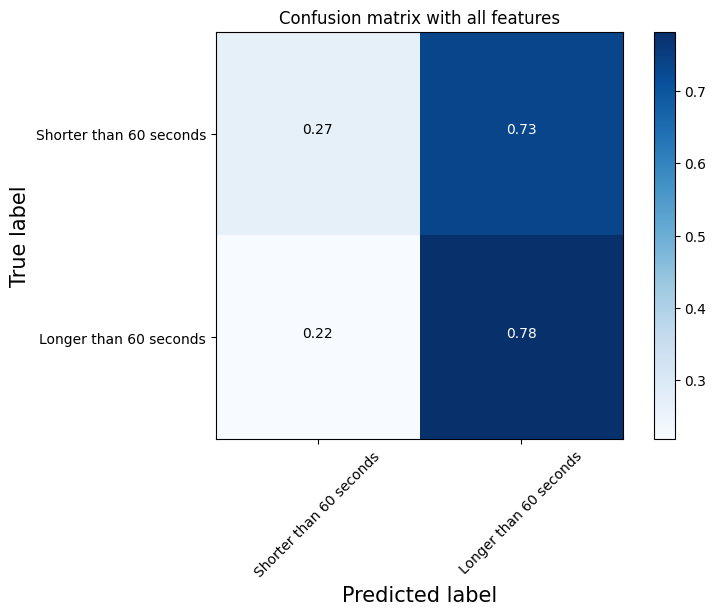

In [ ]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix.
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)


# Print accuracy:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))

# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Shorter than 60 seconds','Longer than 60 seconds'],normalize=True,
                      title='Confusion matrix with all features')

CPU times: user 2.66 ms, sys: 0 ns, total: 2.66 ms
Wall time: 2.68 ms
Accuracy:  0.588
Recall: 0.782051282051282
F1 score: 0.7031700288184438


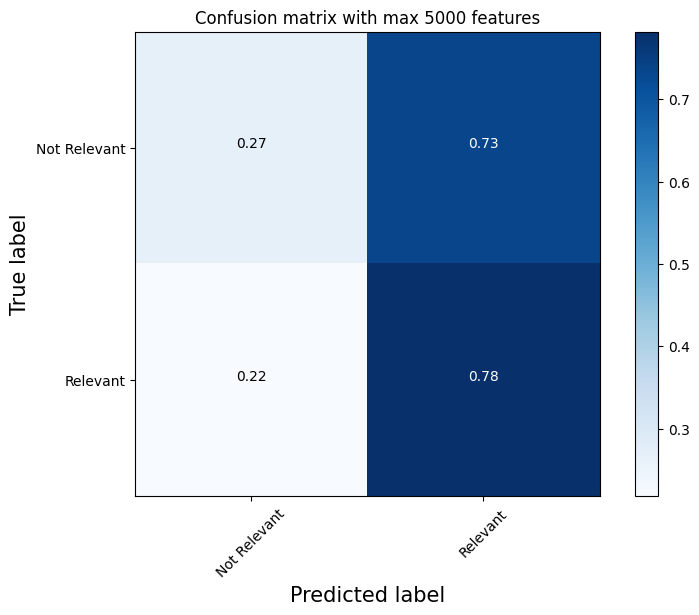

In [ ]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with max 5000 features')

Logistical Regression Classifier

Accuracy:  0.572
Recall: 0.6794871794871795
F1 score: 0.664576802507837


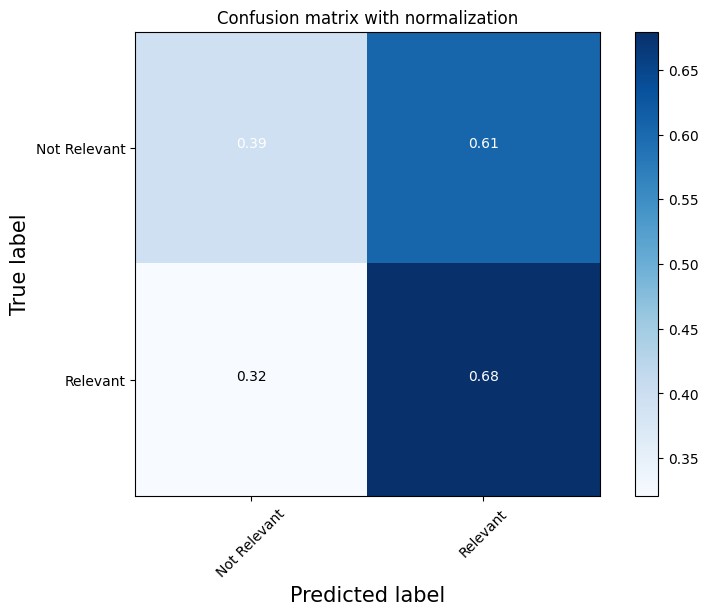

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

Support Vector Machine

Accuracy:  0.588
Recall: 0.6923076923076923
F1 score: 0.677115987460815


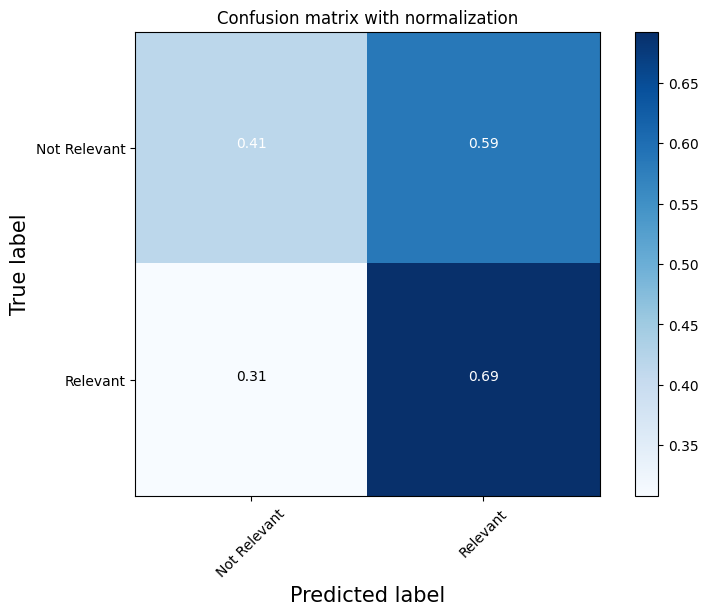

In [ ]:
from sklearn.svm import LinearSVC

vect = CountVectorizer(preprocessor=clean, max_features=5000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

**Linear Regression stuff**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/INFOSYS365/Data/cleaned_UFO.csv')
dataset.head()

,Unnamed: 0,Date_time,city,state,country,shape,length_of_encounter_seconds,duration (hours/min),comments,date_documented,latitude,longitude,date_documented_new,date_doc_year,date_doc_month,date_doc_day,date_time_new,date_time_year,date_time_month,date_time_day
0,0,10/10/1949,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,2004-04-27,2004,4,27,1949-10-10,1949,10,10
1,3,10/10/1956,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,2004-01-17,2004,1,17,1956-10-10,1956,10,10
2,4,10/10/1960,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,2004-01-22,2004,1,22,1960-10-10,1960,10,10
3,5,10/10/1961,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,2007-04-27,2007,4,27,1961-10-10,1961,10,10
4,7,10/10/1965,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,1999-10-02,1999,10,2,1965-10-10,1965,10,10


In [ ]:
# Defining predictor and target variables
X = dataset[['longitude','latitude']]
y = dataset['length_of_encounter_seconds']

# train test split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size =0.25)

# training and fitting the model
model2 = LinearRegression()
model2.fit(X_train, y_train)
model2.predict(X_test)

array([5239.34804465, 7467.50592581, 5646.62365265, ..., 7713.90287262,
       5728.35691244, 7811.15486535])

In [ ]:
model2.score(X_test, y_test)

-2.789148939630337e-05

In [ ]:
X = dataset[['longitude']]
y = dataset['length_of_encounter_seconds']

In [ ]:
X_train1, X_test1, y_train1,y_test1 = train_test_split(X, y, test_size =0.25)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
predicted_values = model.predict(X_test1)

In [ ]:
mean_squared_error(y_test1,predicted_values)

11963699367.126856

In [ ]:
r2_score(y_test1, predicted_values)

-0.002441808950130575

In [ ]:
scores = cross_val_score(model2, X_train1, y_train1, cv=5)
scores

array([-3.22930431e-02, -2.38093039e-05,  2.02668637e-05, -1.94972826e-04,
       -3.64532090e-04])

In [ ]:
print("R-Squared of the model is", scores.mean(), "with a standard deviation of", scores.std())

R-Squared of the model is -0.006571218097917298 with a standard deviation of 0.012861632664960545
